## Week 2 exercises 

### Part 2

#### Exercise 2.1

a has an eulerian path since it has two nodes with uneven degree (3) and two with even degree (2).

b does not have an eulerian path since it has 4 nodes with uneven degree.

c has an eulerian path since all nodes have an even degree.

d has an eulerian path since it has 2 nodes with uneven degree (1 and 3).

#### Exercise 2.3 graph representation using NetworkX

In [155]:
import networkx as nx
import numpy as np

# Network a
a = nx.Graph()
a.add_nodes_from([1,2,3,4,5,6])
a.add_edges_from([(1,2),(1,3),(1,4),(1,6),(2,3),(2,4),(3,6)])
#nx.draw(a, with_labels=True)
adj_mat_a = nx.to_numpy_array(a)
print(adj_mat_a)

# Edge list
Edge_list_a = np.zeros((2, len(a.edges)))
for i, edge in enumerate(a.edges):
    Edge_list_a[0,i] = edge[0]
    Edge_list_a[1,i] = edge[1]

print(Edge_list_a)

#Average clustering coefficient

nx.average_clustering(a)

# Switch labels 5 and 6

a_switched = nx.relabel_nodes(a, {6:5, 5:6})
print(a_switched.nodes)
print(a_switched.edges)

adj_mat_a_switched = nx.to_numpy_array(a_switched)
print(adj_mat_a_switched)

# Edge list
Edge_list_a_switched = np.zeros((2, len(a_switched.edges)))
for i, edge in enumerate(a_switched.edges):
    Edge_list_a_switched[0,i] = edge[0]
    Edge_list_a_switched[1,i] = edge[1]

print(Edge_list_a_switched)

# From the link list you cannot see 'disconnected' nodes and you can also not so easily see clusters

# Find all paths of length 3 from node 1 to node 3 (repetitions of edges and nodes allowed)
def FindPaths(G, i, j, n):
    if n == 0:
        if i == j:
            return [[j]]
        else:
            return []
    paths = [[i]+path for neighbor in G.neighbors(i) for path in FindPaths(G,neighbor, j, n-1)] 
    return paths 

print(FindPaths(a, 1, 3, 3))

# Count the number of cycles of length 4 (no repetitions allowed)
def Findcycles(G, i, j, n):
    if n == 0:
        if i == j:
            return [[j]]
        else:
            return []
    paths = [[i]+path for neighbor in G.neighbors(i) for path in Findcycles(G,neighbor,j, n-1) if i not in path[:-1]] 
    return paths 

print()
count = 0
for node in a.nodes:
    count += len(Findcycles(a, node, node, 4)) 
    print(Findcycles(a, node, node, 4))
print('Cycles: ', count)

#Degree, clustering coefficient, components
print(a.degree())
print(nx.clustering(a))
print(nx.number_connected_components(a))

[[0. 1. 1. 1. 0. 1.]
 [1. 0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 0. 1.]
 [1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0.]]
[[1. 1. 1. 1. 2. 2. 3.]
 [2. 3. 4. 6. 3. 4. 6.]]
[1, 2, 3, 4, 6, 5]
[(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (3, 5)]
[[0. 1. 1. 1. 0. 1.]
 [1. 0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 0. 1.]
 [1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0.]]
[[1. 1. 1. 1. 2. 2. 3.]
 [2. 3. 4. 5. 3. 4. 5.]]
[[1, 2, 1, 3], [1, 3, 1, 3], [1, 3, 2, 3], [1, 3, 6, 3], [1, 4, 1, 3], [1, 4, 2, 3], [1, 6, 1, 3]]

[[1, 2, 3, 6, 1], [1, 3, 2, 4, 1], [1, 4, 2, 3, 1], [1, 6, 3, 2, 1]]
[[2, 1, 6, 3, 2], [2, 3, 1, 4, 2], [2, 3, 6, 1, 2], [2, 4, 1, 3, 2]]
[[3, 1, 4, 2, 3], [3, 2, 1, 6, 3], [3, 2, 4, 1, 3], [3, 6, 1, 2, 3]]
[[4, 1, 3, 2, 4], [4, 2, 3, 1, 4]]
[]
[[6, 1, 2, 3, 6], [6, 3, 2, 1, 6]]
Cycles:  16
[(1, 4), (2, 3), (3, 3), (4, 2), (5, 0), (6, 2)]
{1: 0.5, 2: 0.6666666666666666, 3: 0.6666666666666666, 4: 1.0, 5: 0, 6: 1.0}
2


In [120]:
#Network b
b = nx.DiGraph()
b.add_nodes_from([1,2,3,4,5,6])
b.add_edges_from([(1,2),(2,3), (2,4), (3,2), (3,1), (4,1), (6,1), (6,3)])
#nx.draw(b, with_labels=True)
adj_mat_b = nx.to_numpy_array(b)
print(adj_mat_b)

# Edge list
Edge_list_b = np.zeros((2, len(b.edges)))
for i, edge in enumerate(b.edges):
    Edge_list_b[0,i] = edge[0]
    Edge_list_b[1,i] = edge[1]

print(Edge_list_b)

print(FindPaths(b, 1, 3, 3))

count = 0
for node in b.nodes:
    count += len(Findcycles(b, node, node, 4)) 
print(count)

#Degree, clustering coefficient, components
print(b.degree())
print(nx.clustering(b))
print(nx.number_weakly_connected_components(b))
print(nx.number_strongly_connected_components(b))

[[0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0.]]
[[1. 2. 2. 3. 3. 4. 6. 6.]
 [2. 3. 4. 2. 1. 1. 1. 3.]]
[]
0
[(1, 4), (2, 4), (3, 4), (4, 2), (5, 0), (6, 2)]
{1: 0.3333333333333333, 2: 0.3, 3: 0.3, 4: 0.5, 5: 0, 6: 0.5}
2
3


#### Consider an undirected graph in which all nodes have degree k=1.
Which condition does N have to satisfy? What is the degree distribution of this network? How many components does the network have?

N has to be even. The degree distribution is a 'kroneckers-delte' distribution, all probability mass is centered at k=1. The network must have N/2 components since it will consist of connected pairs of nodes.

#### Consider now a network in which each node has degree k = 2 and clustering coefficient C = 1. How does the network look like? What condition does N satisfy in this case?

The network is made of clusters of 3 fully connected nodes or 'triangles', so N must be a multiple of 3

### bipartite networks

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0.]
 [1. 1. 0. 1. 1. 0.]
 [0. 1. 1. 0. 1. 0.]
 [0. 1. 1. 1. 0. 1.]
 [0. 0. 0. 0. 1. 0.]]
[[0. 1. 1. 0. 0.]
 [1. 0. 1. 0. 0.]
 [1. 1. 0. 1. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]
1.6666666666666667
2.0
2.6666666666666665
2.0


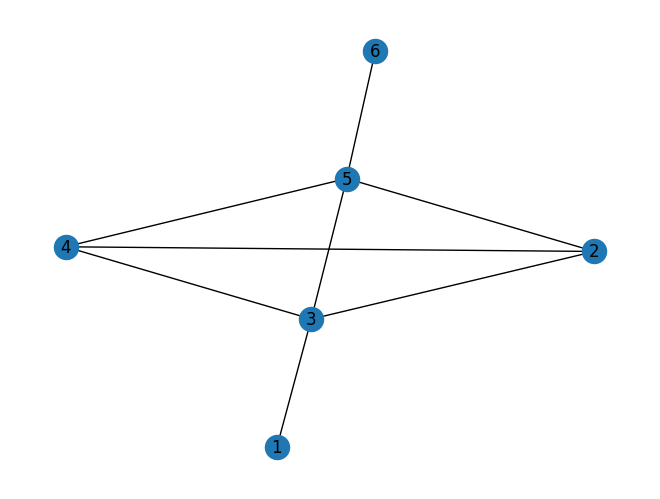

In [150]:
c = nx.Graph()
c.add_nodes_from([i for i in range(1,12)])
c.add_edges_from([(1,7), (2,9), (3,7),(3,8), (3,9), (4,9), (4,10), (5,9), (5,11), (6,11)])
#nx.draw(c, with_labels = 1)
adj_mat_c = nx.to_numpy_array(c)
print(adj_mat_c)
# It is an anti-block diagonal because each of the purple nodes are connected to at least one of the green nodes,
#but not to any of each other
proj1 = nx.projected_graph(c, [1,2,3,4,5,6])
nx.draw(proj1, with_labels=1)
proj2 = nx.projected_graph(c, [7,8,9,10,11])
#nx.draw(proj2, with_labels=1)

# Adjacency of projections
adj_mat_p1 = nx.to_numpy_array(proj1)
print(adj_mat_p1)
adj_mat_p2 = nx.to_numpy_array(proj2)
print(adj_mat_p2)

av_degree1 = np.mean([degree for node, degree in c.degree(nbunch=[1,2,3,4,5,6])])
print(av_degree1)
av_degree2 = np.mean([degree for node, degree in c.degree(nbunch=[7,8,9,10,11])])
print(av_degree2)

av_degree_proj1 = np.mean([degree for node, degree in proj1.degree()])
print(av_degree_proj1)

av_degree_proj2 = np.mean([degree for node, degree in proj2.degree()])
print(av_degree_proj2)

# It is not so surprising that the average degree of a specific color in the bipartite network is not the same 
# as the average degree in the projected network. The projected network connects all the two-step connections from the 
# bipartite network which naturally gives more connections and therefor a higher average degree

#### Consider a bipartite network with N1 and N2 nodes in the two sets.

What is the maximum number of links $L_{max}$ the network can have?
How many links cannot occur compared to a non-bipartite network of size N = N1 + N2 ?

The maximum number of links must be N1 * N2, the all nodes in each 'part' are connected to all nodes in the opposite 'part'.

In a non-bipartite network of size N, the maximum number of link is N(N-1)/2, so N(N-1)/2 - N1*N2 links cannot occur